<a href="https://colab.research.google.com/github/JoaoDiniz409/tensorflow-deep-learning-study/blob/main/O1_neural_network_regressio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Regressão com Redes Neurais em TensorFlow

Há muitas definições para um problema de regressão mas, no nosso caso, vamos simplificá-lo para ser: **prever um número baseada em alguma combinação de variáveis.**

Por exemplo:

* Prever o preço de venda das casas dadas as informações sobre as mesmas(como o número de quartos, tamanho, número de banherios).

* Prever as coordenasdas de uma caixa de delimitação de um artigo numa imagem.

* Prever o custo de um seguro médico para um indivíduo dada a sua demografia(idade, sexo, raça).



In [ ]:
# Import TensorFlow
import tensorflow as tf
import numpy as pd 
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


### Criando alguns dados para visualizar e ajustar.

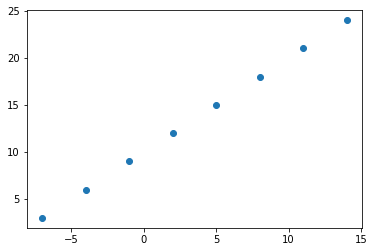

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# X nossa variável independente
# Criando features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# y nossa variável dependente
# Criando labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Para visualizar
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input e output shapes

In [ ]:
# Criando uma demostração de um tensor para o nosso problema de previsão de preços imobiliários
house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Transformando NumPy arrays em tensors com os tipos float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

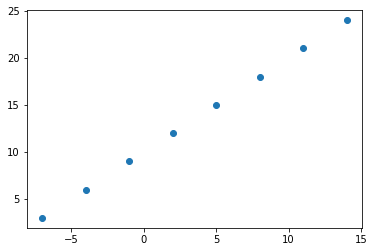

In [ ]:
plt.scatter(X, y)

## Etapas na modelagem com TensorFlow

1. **Criar um modelo** - definir as camadas de entrada e saída, assim como as camadas ocultas de uma rede neural e se estiver usando aprendizado profundo, isso é um modelo de aprendizado profundo.

2. **Compilar o modelo** - precisar definir a função de perda (função que informa ao nosso modelo o quão errado ele está) e o otimizador (que informa ao nosso modelo como melorar os padrões) e as avaliações das metricas (que podemos usar para interpretar o desempenho do nosso model).

3. **Fitting o modelo** - deixar o modelo tentar encontrar padrões entre X e y (features e labels).

**Exercício** estudar documentaçào de tf.keras.Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [ ]:
# Colocar seed aleatória
tf.random.set_seed(42)

# 1. Criando um modelo usando a Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo
model.compile(loss=tf.keras.losses.mae, # mae é abreviatura de mean absolute error || É uma médida de quão erradas estão nossas previsões
              optimizer=tf.keras.optimizers.SGD(), # sgd é abreviatura de stochasitc gradient descent || optimizer informa à nosssa rede neural como pode melhorar
              metrics=["mae"])

# 3. Fit o modelo
# model.fit(X, y, epochs=5) # isto irá quebrar com TensorFlow w.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 306ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Checando os valores de X e y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Tenta fazer um previsão usando o modelo
model.predict([17.0])


array([[12.716021]], dtype=float32)

**REVISÃO**
### Passos na modelagem com TensorFlow

1. Construa ou importe um modelo pertinente para o seu problema

2. Compilar o modelo (prepará-lo para ser utilizado com dados)
  * **Loss** -- quão erradas são as previsões do seu modelo em comparação com as etiquetas da verdade (pretende minimizar isto).
  * **Optimizer** -- como o seu modelo deve atualizar os seus padrões internos para melhorar as suas previsões.
  * **Metrics** -- valores humanos interpretáveis para o quão bem o seu modelo se está a sair.

3. Fit o modelo para os dados de treino para que possa descobrir padrões
  * **Epochs** -- quantas vezes o modelo vai passar por todos os exemplos de treino.

4. Avaliar o modelo nos dados do teste (quão fiáveis são as previsões do nosso modelo?)

### Melhorar o nosso modelo

Podemos melhorar o nosso modelo, alterando os passos que demos para criar um modelo.

1. **Criando um modelo** - aqui podemos adicionar mais camadas, aumentar o número de unidades ocultas (todas chamadas neurónios) dentro de cada uma das camadas ocultas, alterar a função de ativação de cada camada.

2. **Compilando um modelo** - aqui podemos podemos mudar a função de otimização ou talvez a **taxa de aprendizado** de referencia a função de otimização.

3. **Fitting um modelo** - aqui podemos ajustar um modelo para mais **epochs** (deixa o nosso modelo examinar os dados de treino mais vezes e por mais tempo treinando) ou mais dados (dê ao modelo mais exemplos para aprender).

In [ ]:
# Vamos reconstruir o nosso modelo

# 1. Criar o modelo
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit o modelo
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 305ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
# Lembrando dos dados 
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Vamos ver se a previsão do nosso modelo melhorou
model.predict([17.0])

array([[29.739855]], dtype=float32)

### Melhorar um modelo

Formas comuns de melhorar um modelo profundo:
* Adicionando camadas
* Aumentar o número de unidades escondidas
* Alterar as funções de ativação
* Alterar a função de optimização
* Alterar a taxa de aprendizagem
* Adaptação a mais dados
* Adequação por mais tempo

In [ ]:
# Vamos reconstruir o nosso modelo

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo
model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit o modelo
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 374ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4673 -

In [ ]:
# Vamos ver se a previsão do nosso modelo melhorou
model_1.predict([17.0])

array([[26.58353]], dtype=float32)

## Avaliar um modelo

Na prática, um fluxo de trabalho típico a que vai passar quando construir uma rede neural é: 

```
Construir um modelo -> fit -> avaliá-lo -> ajustar um modelo ->
fit -> avaliar -> ajustar um modelo -> fit -> ajustar -> avaliar
```

Quando se trata de avaliação... há 3 palavras que deve memorizar: 

> "Visualizar, visualizar, visualizar"

É uma boa ideia para visualizar:

* Os dados - com que dados estamos a trabalhar? Como é que são?
* O modelo em si - qual é o aspecto do nosso modelo?
* A formação de um modelo - como é que um modelo funciona enquanto aprende?
* As previsões do modelo - como é que as previsões de um modelo se alinham com a verdade do terreno (as labels originais)?

In [ ]:
# Fazendo um dataset maior 
# Começa em -100 vai até 100 pulando 4  
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Fazendo as labels para o dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

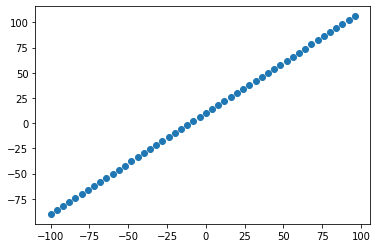

In [ ]:
# Visualizar os dados
import matplotlib.pyplot as plt

plt.scatter(X, y)

### Os 3 conjuntos

* **Conjunto de treino** - o modelo aprende com estes dados, que são tipicamente 70-80% dos dados totais que tem disponíveis.

* **Conjunto de validação** - o modelo é ajustado a estes dados, o que é tipicamente 10-15% dos dados disponíveis.

* **Conjunto de teste** - o modelo é avaliado com estes dados para testar o que foi aprendido, este conjunto é tipicamente 10-15% do total de dados disponíveis.


In [ ]:
# Verificar o comprimento de quantas amostras temos 
len(X)

50

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train = X[:40] # os primeiros 40 são amostras de treino (80% dos dados)
y_train = y[:40]

X_test = X[40:] # os ultimos 10 números (20% dos dados)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizar os dados

Agora temos os nossos dados em formação e conjuntos de teste... vamos visualizá-los novamente!

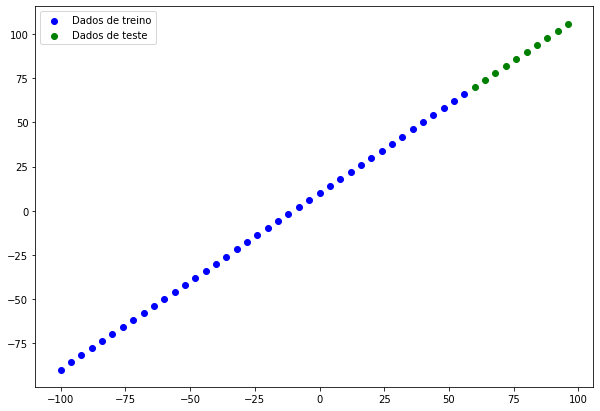

In [ ]:
plt.figure(figsize=(10, 7))

# Mostrar os dados de treino em azul
plt.scatter(X_train, y_train, c="b", label="Dados de treino")

# Mostrar os dados de teste em verde
plt.scatter(X_test, y_test, c="g", label="Dados de teste")

# Mostrar
plt.legend()

In [ ]:
# Vamos dar uma vista de olhos sobre como construir uma rede neural para os nossos dados

# 1. Criando um modelo
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit o modelo
#model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizar o modelo


In [ ]:
# Não funciona (modelo nã fit/built)
# model.summary()

In [ ]:
# Vamos criar um modelo que se constrói automaticamente definindo o argumento input_shape na primeira camada
tf.random.set_seed(42)

# 1. Criando o modelo (o mesmo de cima)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1], name="input_layer")
                             
])

# 2. Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [ ]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Parâmetros totais - número total de parâmetros no modelo.
* Parâmetros treináveis - estes são parâmetros (padrões) que o modelo pode atualizar à medida que treina.
* Parâmetros não treináveis - estes parâmetros não são atualizados durante a formação (isto é típico quando já se trazem padrões de aprendizagem ou parâmetros de outros modelos durante **aprendizagem por transferência**).

**Resource:** Para uma visão mais aprofundada dos parâmetros treináveis dentro de uma camada, consulte a introdução do MIT ao vídeo de aprendizagem profunda.

**Exercício***: Tente brincar com o número de unidades escondidas na camada densa, veja como isso afecta o número de parâmetros (total e treinável), chamando `model.summary()`.

In [ ]:
# 3. Fit o modelo
model.fit(X_train, y_train, epochs=100, verbose=0)



In [ ]:
# Pega o summary do nosso modelo
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


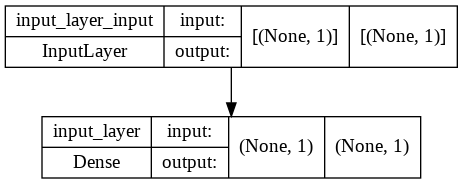

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizando as previsões do nosso modelo 
Para visualizar as previsões, é uma boa ideia plotar então contra os rótulos da verdade do terreno.
Muitas vezes verá isto sob a forma de `y_test` ou `y_true` versus `y_pred` (ground truth versus as previsões do seu modelo).

In [ ]:
# Fazer algumas previsões
y_preds = model.predict(X_test)


In [ ]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**nota**: se gosta de reutilizar algum tipo de funcionalidade no futuro, é uma boa ideia transformá-la numa função.

In [ ]:
# Vamos criar uma função de plotting
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Apresenta dados de treino, dados de teste e compara as previsões com as rótulos da verdade.
  """

  plt.figure(figsize=(10, 7))
  # Dados de treino em azul
  plt.scatter(train_data, train_labels, c="b", label="Dados de treino")
  # Dados de teste em verde
  plt.scatter(test_data, test_labels, c="g", label="Dados de treino")
  # Previsão do modelo em vermelho
  plt.scatter(test_data, predictions, c="r", label="Previsão")
  # Mostrar o legend
  plt.legend();

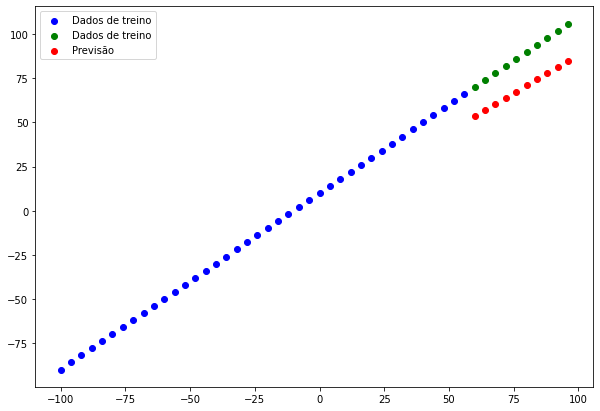

In [ ]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds)

### Avaliando as previsões do nosso modelo com métricas de avaliação de regressão

Ao longo das visualizações, as métricas de avaliação são a sua melhor opção alternativa para avaliar o seu modelo.

Dependendo do problema em que está a trabalhar, diferentes modelos têm diferentes métricas de avaliação.

Os principais índices de avaliação utilizados para problemas de regressão são:

* **Mean absolute error (MAE)** - a diferença média entre cada uma das previsões.
* **Mean squared error (MSE)** - a diferença média quadrática entre as previsões (utilizar se os erros maiores forem mais prejudiciais do que os erros menores).

Quanto mais baixo for cada um destes valores, melhor.

Também pode utilizar `model.evaluation()` que devolverá a perda do modelo, bem como qualquer configuração de métrica durante a etapa de compilação`


In [ ]:
# Avaliar o modelo no conjunto de teste
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 113ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [ ]:
# Calcular o erro médio absoluto
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_preds))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [ ]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)>

In [ ]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
       74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>

In [ ]:
# Calcular o erro médio absoluto
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [ ]:
# Calcular o erro quadrático médio
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [ ]:
# Fazer funções para reusar MAE e MSE
def mae(y_true, y_preds):
  """
  Calcula o erro médio absoluto entre y_test e y_preds.
  """
  return tf.metrics.mean_absolute_error(y_true,
                                        tf.squeeze(y_preds))

def mse(y_true, y_preds):
  """
  Calcula o erro médio ao quadrado entre y_test e y_preds
  """
  return tf.metrics.mean_squared_error(y_true,
                                       tf.squeeze(y_preds))

### Realização de experiências para melhorar o nosso modelo

```
Construir um modelo => encaixá-lo => avaliá-lo => ajustá-lo => encaixá-lo => encaixá-lo =>
avaliar => afinar => encaixar => avaliar ...
```
1. Obtenha mais dados - obtenha mais exemplos para o seu modelo treinar (mais oportunidades para aprender padrões ou relações entre características e rótulos).
2. Faça o seu modelo maior (usando um modelo mais complexo) - isto pode vir sob a forma de mais camadas ou mais unidades escondidas em cada camada.
3. Treine durante mais tempo - dê ao seu modelo mais oportunidades de encontrar padrões nos dados.

Vamos fazer 3 experimentos de modelagem:

1. `model_1` - fazemos o mesmo do modelo original, 1 layer, mas treinar por 100 epochs.
2. `model_2` - 2 layer, treinar por 100 epochs.
3. `model_3` - 2 layer, treinar por 500 epochs.

**Constuir o model_1**

In [ ]:
"""
Cosntruindo o modelo 1
"""
# Colocar seed aleatória
tf.random.set_seed(42)

# 1. Criando um modelo 
model_1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
])
# 2. Compilar o modelo
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit o modelo
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - 

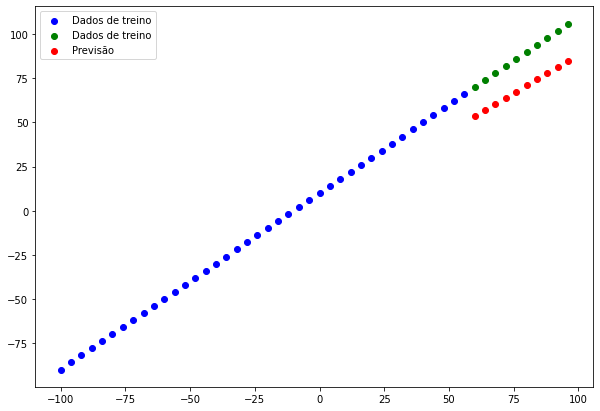

In [ ]:
# Vamos plota previões do model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
"""
Cosntruindo o modelo 2
"""
# Colocar um seed aleatória 
tf.random.set_seed(42)

# 1. Criar o model
model_2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compilar o model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit o model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 6ms/

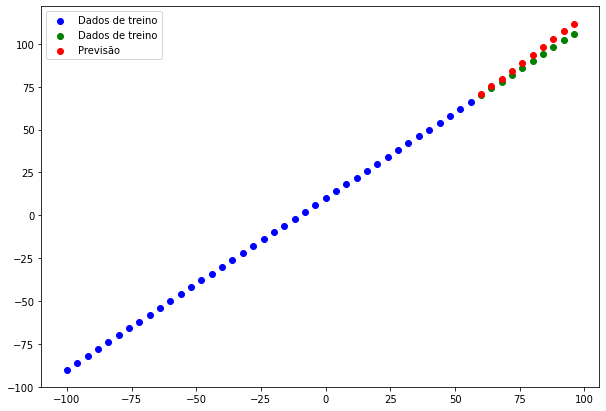

In [ ]:
# Vamos plotar as previsões do modelo_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculando a evolução da metricasdo modelo _2
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [ ]:
"""
Cosntruindo o modelo 3
"""
# Colocar um seed aleatória 
tf.random.set_seed(42)

# 1. Criar o model
model_3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compilar o model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit o model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 4ms/

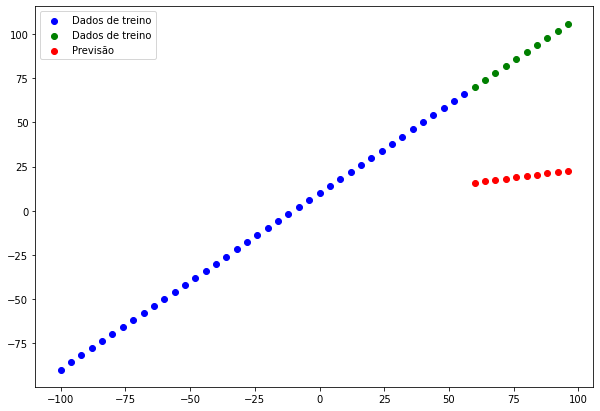

In [ ]:
# Vamos plotar as previsões do modelo_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculando a evolução da metricasdo modelo_3
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 **Nota:** Quer começar com pequenas experiências (modelos pequenos) e certificar-se de que funcionam e de que aumentam a sua escala quando necessário.

### Comparando os resultados das nossas experiências

fizemos algumas experiências, vamos comparar os resultados.

In [ ]:
# Vamos comparar os resultados dos modelos usando pandas para criar um DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
model_2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 10)                20        
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Nota:** Um dos seus principais objetivos deve ser minimizar
o tempo que medeia entre as suas experiências. Quanto mais experiências fizer, mais. Coisas vai descobrir que não funcionam e, por sua vez, ficar mais perto de descobrir o que funciona. Lembrem-se do lema do praticante de aprendizagem de máquinas: "experimentar, experimentar, experimentar".

## Seguindo as suas experiências

Um bom hábito na aprendizagem de modelos de máquinas é seguir os resultados das suas experiências.

E, ao fazê-lo, pode ser aborrecido se estiver a fazer muitas experiências.

Felizmente, existem ferramentas para nos ajudar!

**Resource:** À medida que constrói mais modelos, vai querer estudar a sua utilização: 

* TensorBoard - um componente da biblioteca TensoFlow para ajudar a seguir as experiências de modelagem (veremos esta mais tarde).
* Weights & Biases - uma ferramenta para rastrear todos os tipos de experiências de aprendizagem de máquinas (encaixa directamente no TensorBoard).

### Salvar os nossos modelos

Salvar os nossos modelos permite-nos utilizá-los fora do Google Colab (ou onde quer que tenham recebido formação), como numa aplicação web ou numa aplicação móvel.

* O formato SavedModel 
* O formato HDF5

In [ ]:
# Salvando o nosso modelo usando o formanto SavedModel
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Salvando o nosso modelo usando o formanto HDF5
model_2.save("best_model_HDF5_format.h5")

### Carregamento de um modelo salvo

In [ ]:
# Carregar o modelo no formato SavedModel
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 10)                20        
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comparar as previsões do modelo_2 com as previsões do modelo em formato SavedModel
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Carregar o modelo utilizando o formato .h5
loaded_h5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_format.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 10)                20        
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 10)                20        
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Verificar se as previsões do modelo .h5 carregado correspondem ao modelo_2
loaded_h5_format_preds = loaded_h5_format.predict(X_test)
model_2_preds == loaded_h5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download de um modelo (ou qualquer outro arquivo) a partir do Google Colab

Se quiser fazer o download dos seus arquivos a partir do Google Colab:

1. Pode ir para o separador " arquivos" e clicar em cima do arquivo que pretende e clicar em "download".
2. Usar código (ver a célula abaixo)
3. Guarde-o no Google Drive ligando o Google Drive e copiando-o para lá (ver 2ª célula de código abaixo).

In [ ]:
# Download de um arquivo do Google Colab
from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

### Um exemplo maior

Muito bem, já vimos os fundamentos da construção de modelos de regressão de redes neurais em TensorFlow.

Vamos aumentar a escala e construir um modelo para um conjunto de dados mais ricos em características.

Mais especificamente, vamos tentar prever o custo do seguro médico para cada indivíduos com base numa série de parâmetros diferentes, tais como, idade, sexo, bmi, crianças, estado do tabagismo e região residencial.

Para tal, vamos aproveitar o conjunto de dados de Custo Médicos disponíveis no Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance e no GitHub: https://github.com/stedy/Machine-Learning-with-R-datasets

 
**Descrições dos Dados**

* **age**: idade do beneficiário primário

* **sex**: sexo do segurado, feminino, masculino
* **bmi**: Índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura,
índice objectivo de peso corporal (kg / m ^ 2) utilizando a relação altura/peso, idealmente 18,5 a 24,9
* **children**: Número de crianças cobertas pelo seguro de saúde / Número de dependentes
* **smoker**: Fumador:
* **region**: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.
* **charges**: Custos médicos individuais facturados pelo seguro de saúde

In [ ]:
# Importar bibliotecas necessárias
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
# Ler no conjunto de dados de seguros
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Vamos experimentar "one_hot encode" no nosso DataFrame para que sejam todos os números
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Criar valores X e y (features e labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# Ver X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# Ver y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Criar conjuntos de formação e testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Construir uma rede neural (tipo de modelo_2 acima)
tf.random.set_seed(42)

# 1. Criando o modelo
insurance_model = tf.keras.Sequential([
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit o modelo
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Checando os resultados do insurance model usando os dados de teste
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Neste momento parece que o nosso modelo não está a funcionar muito bem... vamos tentar melhorá-lo!

Para (tentar) melhorar o nosso modelo, faremos 2 experiências:
1. Adicionar uma camada extra com mais unidades escondidas e usar o Adam optimizer
2. O mesmo que o anterior, mas com treino por mais tempo (200 épocas)

In [ ]:
# Colocar uma seed aleatória 
tf.random.set_seed(42)

# 1. Criar o modelo
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo 
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit o modelo
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# Colocar uma seed aleatória
tf.random.set_seed(42)

# 1. Criando um modelo (o mesmo que o de cima).
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo 
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit o modelo
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

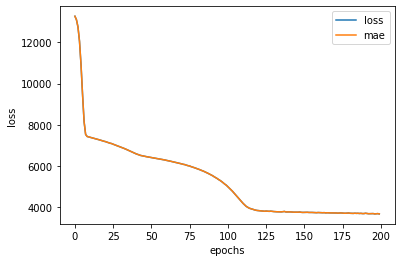

In [ ]:
# História do lote (também conhecido como uma curva de perda ou uma curva de treino)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Colocar uma seed aleatória
tf.random.set_seed(42)

# 1. Criando um modelo (o mesmo que o de cima).
insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo 
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit o modelo
history_2 = insurance_model_4.fit(X_train, y_train, epochs=400)

Epoch 1/400
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3159.7324 - mae: 3159.7324


[3159.732421875, 3159.732421875]

> **Pergunta** Quanto tempo deve treinar?

Depende. Realmente... depende do problema em que se está a trabalhar. No entanto, muitas pessoas já fizeram esta pergunta antes... por isso TensorFlow tem uma solução! Chama-se o [Callback do EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), que é uma componente do TensorFlow que pode adicionar ao seu modelo para parar de treinar uma vez que deixe de melhorar uma determinada métrica.

## Pré-processamento de dados (normalização e padronização)

Em termos de escala de valores, as redes neurais tendem a preferir a normalização.

Se não tiver a certeza sobre qual utilizar, poderá tentar ambas e ver qual tem melhor desempenho.

In [ ]:
# Importar bibliotecas necessárias
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Ler no conjunto de dados de seguros
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Vamos criar um transformador de coluna
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # transformar todos os valores nestas colunas entre 0 e 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Criar X e y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Construindo o nosso conjunto de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit o transformador de coluna para os nossos dados de treino
ct.fit(X_train)

# Transformar dados de treino e teste com normalização (MinMaxScaler) fim OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Como são agora os nossos dados ?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Bonito! Os nossos dados foram normalizados e (OneHotEncoded). Agora vamos construir um modelo de rede neural sobre ele e ver como corre.

In [ ]:
# Construir um modelo de rede neural para caber nos nossos dados normalizados
tf.random.set_seed(42)

# 1. Criando o modelo
insurance_model_5 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2. Compilar o model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
insurance_model_5.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [ ]:
# Avaliar o nosso modelo de seguros com dados normalizados
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477

In [ ]:
insurance_model_2.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 100)               1200      
                                                                 
 dense_67 (Dense)            (None, 10)                1010      
                                                                 
 dense_68 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


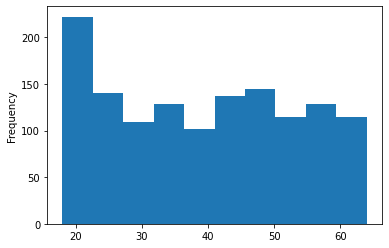

In [ ]:
X["age"].plot(kind="hist")

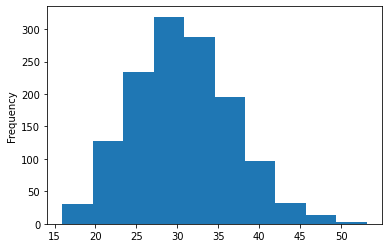

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64